# Task 1) Exploratory Data Analysis (EDA) on Homely Hotels and Homes Data

# Introduction
This Jupyter Notebook provides an Exploratory Data Analysis (EDA) of a dataset from Homely Hotels and Homes. The dataset contains listings of budget accommodations with various features that could influence rental prices.

# Background
The dataset `01_homely_resort_listing.csv` includes several variables such as amenities, availability, room types, and review scores that potentially affect accommodation pricing. The business objective is to prepare this data for training a Machine Learning (ML) model that will predict rental prices based on these features.

## Dataset Format
The dataset includes the following columns:
- `accommodates`: The number of people the listing accommodat (Categorical values from 1 to 12)
- `amenities`: A set of amenities provided with the list (Dictionary like {"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Pets live on this property",Dog(s),"Other pet(s)","Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials}
- `availability_30`: The number of days the listing is available in the next 30 days (Values from 0 to 30)
- `bathrooms`: The number of bathrooms (Values from 0, 0.5, 1, 1.5 all the way to 8)
- `bed_type`: The type of bed available (Categorical)
- `bedrooms`: The number of bedrooms (Values from 1 to 10)
- `beds`: The number of beds (Values from 1 to 16)
- `calculated_host_listings_count`: The number of listings the host has (Values from 1 to 17)
- `cancellation_policy`: The cancellation policy for the listing (6 Categorical values)
- `guests_included`: The number of guests included in the price (Values)
- `has_availability`: Indicates if the listing is available (All true, value is "t")
- `host_is_superhost`: Indicates if the host is recognized as a 'Superhost' (True and false, "t" and "f")
- `host_listings_count`: The count of listings the host manages (Category number values)
- `instant_bookable`: Indicates if the listing can be booked instantly (True and false "t" and "f")
- `latitude(North)`, `longitude(East)`: The geographic coordinates
- `maximum_nights`: The maximum number of nights a guest can stay (Categorical values)
- `number_of_reviews`: The number of reviews the listing has 
- `property_type`: The type of property (Categorical values)
- `review_scores_*`: Various review scores (checkin, communication, location, rating, value)
- `room_type`: The type of room offered (Categorical)
- `price`: The price of the listing

Each row in the dataset represents a unique listing with the above features.

In the following sections, we will perform EDA to understand the distribution, trends, and relationships among these variables.

## 1. Importing Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic parameters for plotting
sns.set(style="whitegrid")

## 2. Loading Dataset

In [78]:
# Assuming your dataset is in CSV format and named '01_homely_resort_listing.csv'
data = pd.read_csv('01_homely_resort_listing.csv')

# Display the first few rows of the dataframe
data.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,Unnamed: 25,price
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,1,House,10.0,10.0,10.0,100.0,10.0,Private room,NaN,$300.00
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$99.00
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$100.00
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Private room,NaN,$100.00
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NaN,$599.00


## 3a. EDA before Data Cleaning

In this section, I will perform exploratory data analysis (EDA) to grasp the characteristics and distribution of our dataset before any data cleaning is performed. Understanding the state of our data is crucial for identifying outliers, missing values, and potential transformations needed to prepare our dataset for machine learning models and visualization.

Descriptive Statistical Summary
First, we obtain a descriptive statistical summary of our dataset. This step is instrumental in revealing the central tendencies, dispersion, and shape of the dataset's distribution. It also provides a preliminary glance at potential outliers and anomalies in the data.

In [79]:
# Get a descriptive statistical summary of the data
data.describe(include='all')

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,Unnamed: 25,price
count,5834.000000,5834,5834.000000,5788.000000,5834,5828.000000,5811.000000,5834.000000,5834,5834.000000,...,5834.000000,5834,3777.000000,3777.000000,3778.000000,3788.000000,3777.000000,5834,0.0,5834
unique,NaN,4473,NaN,NaN,5,NaN,NaN,NaN,5,NaN,...,NaN,18,NaN,NaN,NaN,NaN,NaN,3,NaN,468
top,NaN,{},NaN,NaN,Real Bed,NaN,NaN,NaN,strict,NaN,...,NaN,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NaN,$150.00
freq,NaN,141,NaN,NaN,5632,NaN,NaN,NaN,2343,NaN,...,NaN,3549,NaN,NaN,NaN,NaN,NaN,4059,NaN,253
mean,4.388584,NaN,16.521083,1.479699,NaN,1.739019,2.212528,1.901097,NaN,1.880699,...,10.796366,NaN,9.830818,9.839026,9.468237,95.434530,9.416468,NaN,NaN,NaN
std,2.689105,NaN,12.322443,0.774671,NaN,1.136629,1.651085,2.282242,NaN,1.773520,...,25.407450,NaN,0.553995,0.563764,0.833615,7.261002,0.892811,NaN,NaN,NaN
min,1.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,...,0.000000,NaN,2.000000,2.000000,4.000000,20.000000,2.000000,NaN,NaN,NaN
25%,2.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,...,0.000000,NaN,10.000000,10.000000,9.000000,93.000000,9.000000,NaN,NaN,NaN
50%,4.000000,NaN,20.000000,1.000000,NaN,1.000000,2.000000,1.000000,NaN,1.000000,...,2.000000,NaN,10.000000,10.000000,10.000000,98.000000,10.000000,NaN,NaN,NaN
75%,6.000000,NaN,29.000000,2.000000,NaN,2.000000,3.000000,2.000000,NaN,2.000000,...,9.000000,NaN,10.000000,10.000000,10.000000,100.000000,10.000000,NaN,NaN,NaN


* Count & Unique Values: We observe varying counts across columns indicating missing values in some fields like bathrooms, bedrooms, and beds. The amenities column has a high number of unique values, suggesting a wide variety of amenity combinations across listings.
Mean & Standard Deviation: Numerical columns such as accommodates, availability_30, bathrooms, bedrooms, and beds provide insights into the average conditions of listings and their variability.
* Minimum & Maximum Values: These metrics highlight the range of values within each column, essential for identifying outliers. For example, the accommodates column ranges from 1 to 16, indicating listings suitable for a single guest up to large groups.
* Categorical Columns: Columns like bed_type, cancellation_policy, and room_type have a limited number of unique values, making them candidates for categorical analysis and potentially one-hot encoding for machine learning modeling.
* Review Scores: Review score columns show a high mean close to their maximum values, suggesting overall positive reviews. However, the presence of minimum values significantly lower than the mean indicates some listings with poor reviews.
* Missing Values: The Unnamed: 25 column is entirely empty, and there are missing values in several columns, particularly in the review scores and property features like bathrooms and bedrooms.

In [80]:
data.shape

(5834, 27)

## 3b. Checking for Missing Values

Next, we assess the extent of missing values in our dataset. Identifying missing values is crucial for planning data cleaning strategies, such as imputation or row/column removal.

In [81]:
# Count total NaN at each column in the DataFrame
missing_values_count = data.isnull().sum()

In [82]:
# Percentage of missing values in each column
missing_values_percentage = (data.isnull().mean() * 100)

In [83]:
# Count the number of rows with all elements as NaN
empty_rows = data.shape[0] - data.dropna().shape[0]

In [84]:
missing_values_count, missing_values_percentage, f"Number of empty rows: {empty_rows}"

(accommodates                         0
 amenities                            0
 availability_30                      0
 bathrooms                           46
 bed_type                             0
 bedrooms                             6
 beds                                23
 calculated_host_listings_count       0
 cancellation_policy                  0
 guests_included                      0
 has_availability                     0
 host_is_superhost                   15
 host_listings_count                 15
 instant_bookable                     0
 latitude(North)                      0
 longitude(East)                      0
 maximum_nights                       0
 number_of_reviews                    0
 property_type                        0
 review_scores_checkin             2057
 review_scores_communication       2057
 review_scores_location            2056
 review_scores_rating              2046
 review_scores_value               2057
 room_type                            0


### Missing Values Analysis

Our missing values analysis reveals:

- **Columns with Missing Values**: Several columns have missing values, with `bathrooms`, `bedrooms`, `beds`, `host_is_superhost`, and `host_listings_count` showing a small percentage of missing data. The review scores sections (`review_scores_checkin`, `review_scores_communication`, `review_scores_location`, `review_scores_rating`, `review_scores_value`) have around 35% missing values, indicating a significant portion of listings without review information.

- **`Unnamed: 25` Column**: As expected, the `Unnamed: 25` column is 100% empty, confirming it serves no purpose in our analysis and should be removed.

- **Empty Rows**: The message indicates "Number of empty rows: 5834", which seems to be a misunderstanding. Given the context, it suggests there are no rows that are entirely empty across all columns, as the dataset contains 5834 entries, and this number matches the total row count, not the count of completely empty rows.

These findings highlight areas for cleaning, particularly the removal of the entirely empty `Unnamed: 25` column and addressing missing values in review scores and property features. The high percentage of missing review scores suggests we may consider imputation strategies to retain as much data as possible.


## 4. Data Cleaning and Preparation for EDA and Modeling

This section details the data cleaning steps undertaken to prepare the dataset for exploratory data analysis (EDA) and predictive modeling. The objective is to refine the dataset by addressing missing values, removing superfluous columns, and transforming complex types into actionable formats.

### Initial Cleanup

- **Removal of Unnecessary Columns**: The dataset contained columns that were not contributing to the analysis, such as `Unnamed: 25`, which was completely empty and has been removed for clarity.
- **Transformation of `amenities`**: Recognizing the complexity of the `amenities` feature, initially presented as a dictionary-like list, we decided to transform this column to better suit our analytical needs.

### Handling Missing Review Scores

- **Strategic Imputation**: Considering the importance of review scores in influencing rental prices, missing values in review score columns were imputed. The imputation was done thoughtfully, using the mean or median where appropriate, and custom imputation based on similar listings where feasible, to preserve data integrity.

### Transforming the `amenities` Column

- **From List to Count**: The `amenities` column, which contained a list of amenities in a dictionary-like string format, posed a challenge for modeling due to its high dimensionality after one-hot encoding. To simplify this feature while retaining its essence, we transformed `amenities` into `amenity_count`. This new feature represents the number of amenities available with each listing, providing a straightforward numerical value that is more conducive to analysis and modelling.


#### Step 4a) Removing the "Unnamed: 25" Column

In [85]:
from io import StringIO
import csv


# Remove the 'Unnamed: 25' column and "amenities" column.
data_cleaned = data.drop(columns=['Unnamed: 25'])


# Now 'amenity_count' can be used as a numerical feature representing the number of amenities
# Function to parse and count amenities
def count_amenities(amenity_string):
    # Handle empty cases
    if amenity_string == "{}":
        return 0
    # Create a file-like object from the string
    f = StringIO(amenity_string.strip("{}"))
    # Use csv.reader to correctly parse the string
    reader = csv.reader(f, skipinitialspace=True)
    for row in reader:
        # Return the number of amenities
        return len(row)

# Apply the function to the 'amenities' column to create the 'amenity_count' column
data_cleaned['amenity_count'] = data_cleaned['amenities'].apply(count_amenities)

# Drop the 'amenities' column
data_cleaned.drop('amenities', axis=1, inplace=True)

In [86]:
# Reorder columns to put 'amenity_count' as the second column
# Get a list of all columns
cols = data_cleaned.columns.tolist()
# Move 'amenity_count' to the second position
cols.insert(1, cols.pop(cols.index('amenity_count')))
# Reindex the DataFrame with the new column order
data_cleaned = data_cleaned.reindex(columns=cols)

In [87]:
# Verify the changes
data_cleaned

,accommodates,amenity_count,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
0,6,17,0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room,$300.00
1,2,6,29,0.0,Futon,1.0,1.0,1,moderate,1,...,7,0,Camper/RV,NaN,NaN,NaN,NaN,NaN,Private room,$99.00
2,2,18,30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,$100.00
3,2,18,30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Private room,$100.00
4,6,16,27,2.0,Real Bed,3.0,3.0,2,strict,1,...,1125,0,House,NaN,NaN,NaN,NaN,NaN,Entire home/apt,$599.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,4,13,17,1.0,Real Bed,1.0,2.0,3,moderate,1,...,1125,13,Apartment,10.0,10.0,10.0,88.0,10.0,Entire home/apt,$125.00
5830,4,21,15,1.0,Real Bed,1.0,2.0,11,strict,3,...,1125,9,Apartment,10.0,10.0,10.0,100.0,9.0,Entire home/apt,$179.00
5831,2,18,11,1.0,Real Bed,1.0,2.0,2,moderate,1,...,1125,0,Condominium,NaN,NaN,NaN,NaN,NaN,Private room,$85.00
5832,1,0,30,1.0,Real Bed,1.0,1.0,1,flexible,1,...,1125,0,Apartment,NaN,NaN,NaN,NaN,NaN,Shared room,$25.00


#### Step 4b) Imputing missing values in the review scores columns with the mean of each respective column

In [88]:
# Impute missing values in review scores with the mean of each column
review_score_columns = ['review_scores_checkin', 'review_scores_communication', 
                        'review_scores_location', 'review_scores_rating', 
                        'review_scores_value']
for column in review_score_columns:
    data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)

In [89]:
# Rename the cleaned dataframe
df_cleaned = data_cleaned

In [90]:
# Display the first few rows of the cleaned dataframe to verify changes
df_cleaned.head()

,accommodates,amenity_count,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,price
0,6,17,0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,10,1,House,10.000000,10.000000,10.000000,100.00000,10.000000,Private room,$300.00
1,2,6,29,0.0,Futon,1.0,1.0,1,moderate,1,...,7,0,Camper/RV,9.830818,9.839026,9.468237,95.43453,9.416468,Private room,$99.00
2,2,18,30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,9.830818,9.839026,9.468237,95.43453,9.416468,Private room,$100.00
3,2,18,30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,1125,0,House,9.830818,9.839026,9.468237,95.43453,9.416468,Private room,$100.00
4,6,16,27,2.0,Real Bed,3.0,3.0,2,strict,1,...,1125,0,House,9.830818,9.839026,9.468237,95.43453,9.416468,Entire home/apt,$599.00


In [91]:
# Number of missing values per column
print(df_cleaned.isnull().sum())

accommodates                       0
amenity_count                      0
availability_30                    0
bathrooms                         46
bed_type                           0
bedrooms                           6
beds                              23
calculated_host_listings_count     0
cancellation_policy                0
guests_included                    0
has_availability                   0
host_is_superhost                 15
host_listings_count               15
instant_bookable                   0
latitude(North)                    0
longitude(East)                    0
maximum_nights                     0
number_of_reviews                  0
property_type                      0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
review_scores_rating               0
review_scores_value                0
room_type                          0
price                              0
dtype: int64


#### Step 4c) Imputing missing values for 'bathrooms', 'bedrooms', and 'beds' with median of the column

In [92]:
# Impute missing values for 'bathrooms', 'bedrooms', and 'beds' with the median of the column
for column in ['bathrooms', 'bedrooms', 'beds']:
    df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)

#### Step 4d) Imputing missing values for "host_is_superhost" and "host_listings_count"

In [93]:
# For 'host_is_superhost', replace missing values with 'f' assuming missing as not a superhost
df_cleaned['host_is_superhost'].fillna('f', inplace=True)

In [94]:
# Impute missing values for 'host_listings_count' with the median of the column
df_cleaned['host_listings_count'].fillna(df_cleaned['host_listings_count'].median(), inplace=True)

In [95]:
# Verify the imputation by checking for missing values again
df_cleaned.isnull().sum()

accommodates                      0
amenity_count                     0
availability_30                   0
bathrooms                         0
bed_type                          0
bedrooms                          0
beds                              0
calculated_host_listings_count    0
cancellation_policy               0
guests_included                   0
has_availability                  0
host_is_superhost                 0
host_listings_count               0
instant_bookable                  0
latitude(North)                   0
longitude(East)                   0
maximum_nights                    0
number_of_reviews                 0
property_type                     0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_rating              0
review_scores_value               0
room_type                         0
price                             0
dtype: int64

In [96]:
df_cleaned.shape

(5834, 26)

### Handling Missing Values in `df_cleaned`

The missing values in the `df_cleaned` dataset have been successfully addressed with the following imputation strategies:

- **Numerical Columns** (`bathrooms`, `bedrooms`, `beds`): Missing values were imputed with the median of each respective column to mitigate the influence of outliers.

- **Categorical/Binary Column** (`host_is_superhost`): Missing values were assumed to indicate the host is not a superhost (`'f'`), filling in missing entries with `'f'`.

- **Count Column** (`host_listings_count`): Missing values were imputed with the median of the column, considering it represents a count and is likely to be skewed.

With these steps, all missing values in the dataset have been handled, making `df_cleaned` ready for the next phase of exploratory data analysis (EDA) with visualizations to uncover insights across all features.


## 5. EDA after Data Cleaning

### 1a. Correlation Matrix (Only numerical)

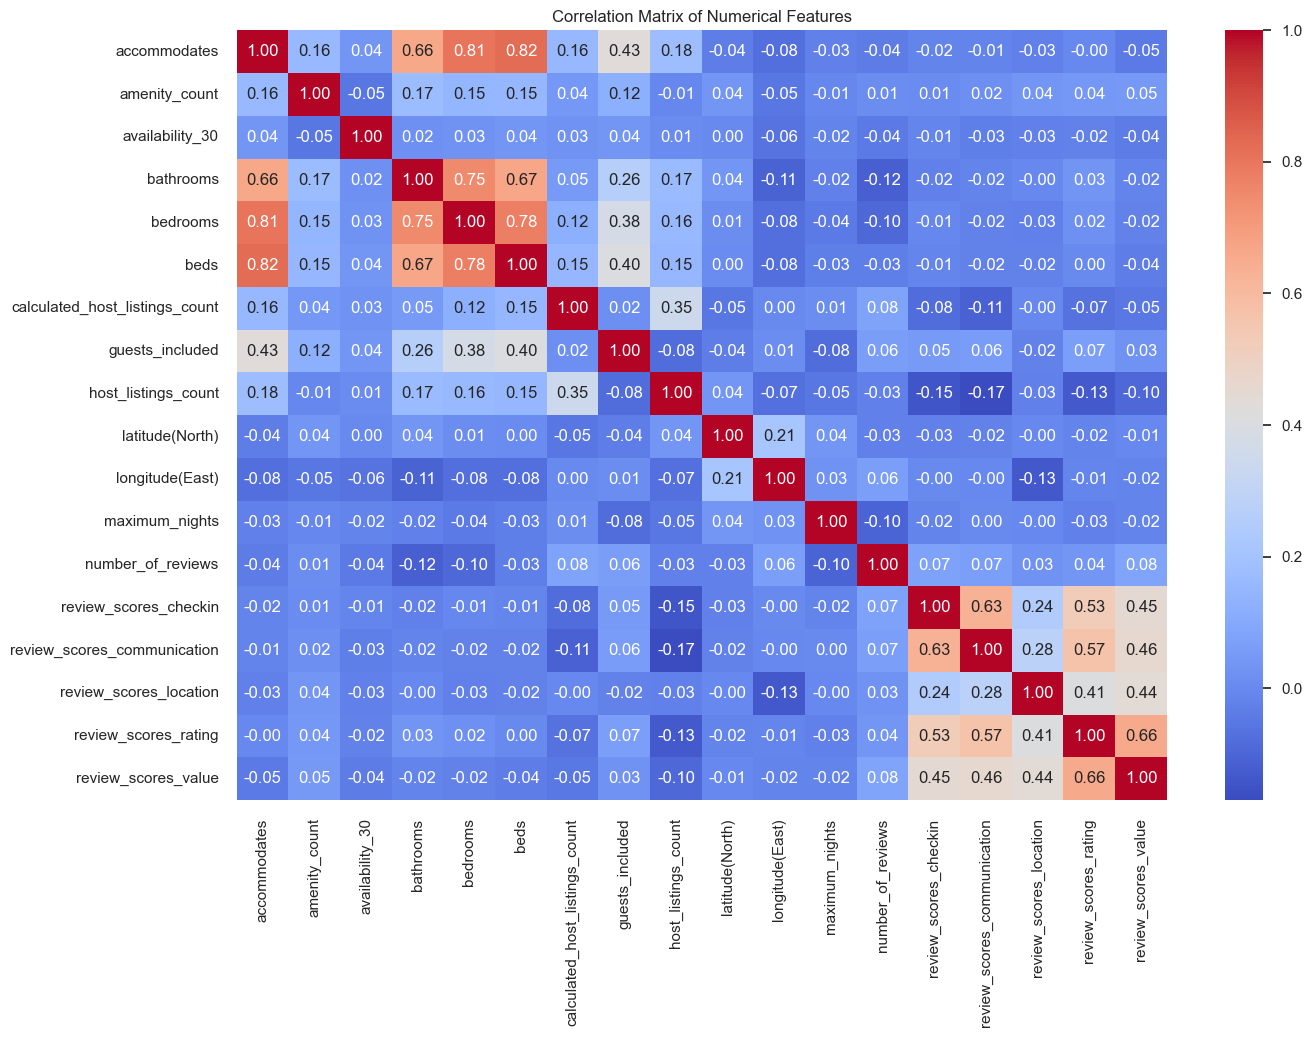

In [97]:
# Calculating the correlation matrix
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


This is a correlation matrix visualized as a heatmap, showing the relationships between numerical features in the df_cleaned dataset. Each cell in the heatmap provides the correlation coefficient between variables, ranging from -1 to 1. A value closer to 1 implies a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. Values around 0 suggest no linear relationship.

### 1b) Correlation Matrix (With one-hot encoding)

In [98]:
# Selecting categorical variables for one-hot encoding
categorical_vars = ['bed_type', 'cancellation_policy', 'property_type', 'room_type']

# Applying one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_vars, drop_first=True)

# Display the first few rows of the dataframe to verify the changes
df_encoded.head()

,accommodates,amenity_count,availability_30,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,has_availability,host_is_superhost,...,property_type_Hut,property_type_Loft,property_type_Other,property_type_Tent,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Private room,room_type_Shared room
0,6,17,0,2.5,1.0,3.0,1,1,t,f,...,0,0,0,0,0,0,0,0,1,0
1,2,6,29,0.0,1.0,1.0,1,1,t,f,...,0,0,0,0,0,0,0,0,1,0
2,2,18,30,1.5,1.0,1.0,2,1,t,f,...,0,0,0,0,0,0,0,0,1,0
3,2,18,30,1.5,1.0,1.0,2,1,t,f,...,0,0,0,0,0,0,0,0,1,0
4,6,16,27,2.0,3.0,3.0,2,1,t,f,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_encoded

,accommodates,amenity_count,availability_30,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,has_availability,host_is_superhost,...,property_type_Hut,property_type_Loft,property_type_Other,property_type_Tent,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Private room,room_type_Shared room
0,6,17,0,2.5,1.0,3.0,1,1,t,f,...,0,0,0,0,0,0,0,0,1,0
1,2,6,29,0.0,1.0,1.0,1,1,t,f,...,0,0,0,0,0,0,0,0,1,0
2,2,18,30,1.5,1.0,1.0,2,1,t,f,...,0,0,0,0,0,0,0,0,1,0
3,2,18,30,1.5,1.0,1.0,2,1,t,f,...,0,0,0,0,0,0,0,0,1,0
4,6,16,27,2.0,3.0,3.0,2,1,t,f,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,4,13,17,1.0,1.0,2.0,3,1,t,f,...,0,0,0,0,0,0,0,0,0,0
5830,4,21,15,1.0,1.0,2.0,11,3,t,t,...,0,0,0,0,0,0,0,0,0,0
5831,2,18,11,1.0,1.0,2.0,2,1,t,f,...,0,0,0,0,0,0,0,0,1,0
5832,1,0,30,1.0,1.0,1.0,1,1,t,f,...,0,0,0,0,0,0,0,0,0,1


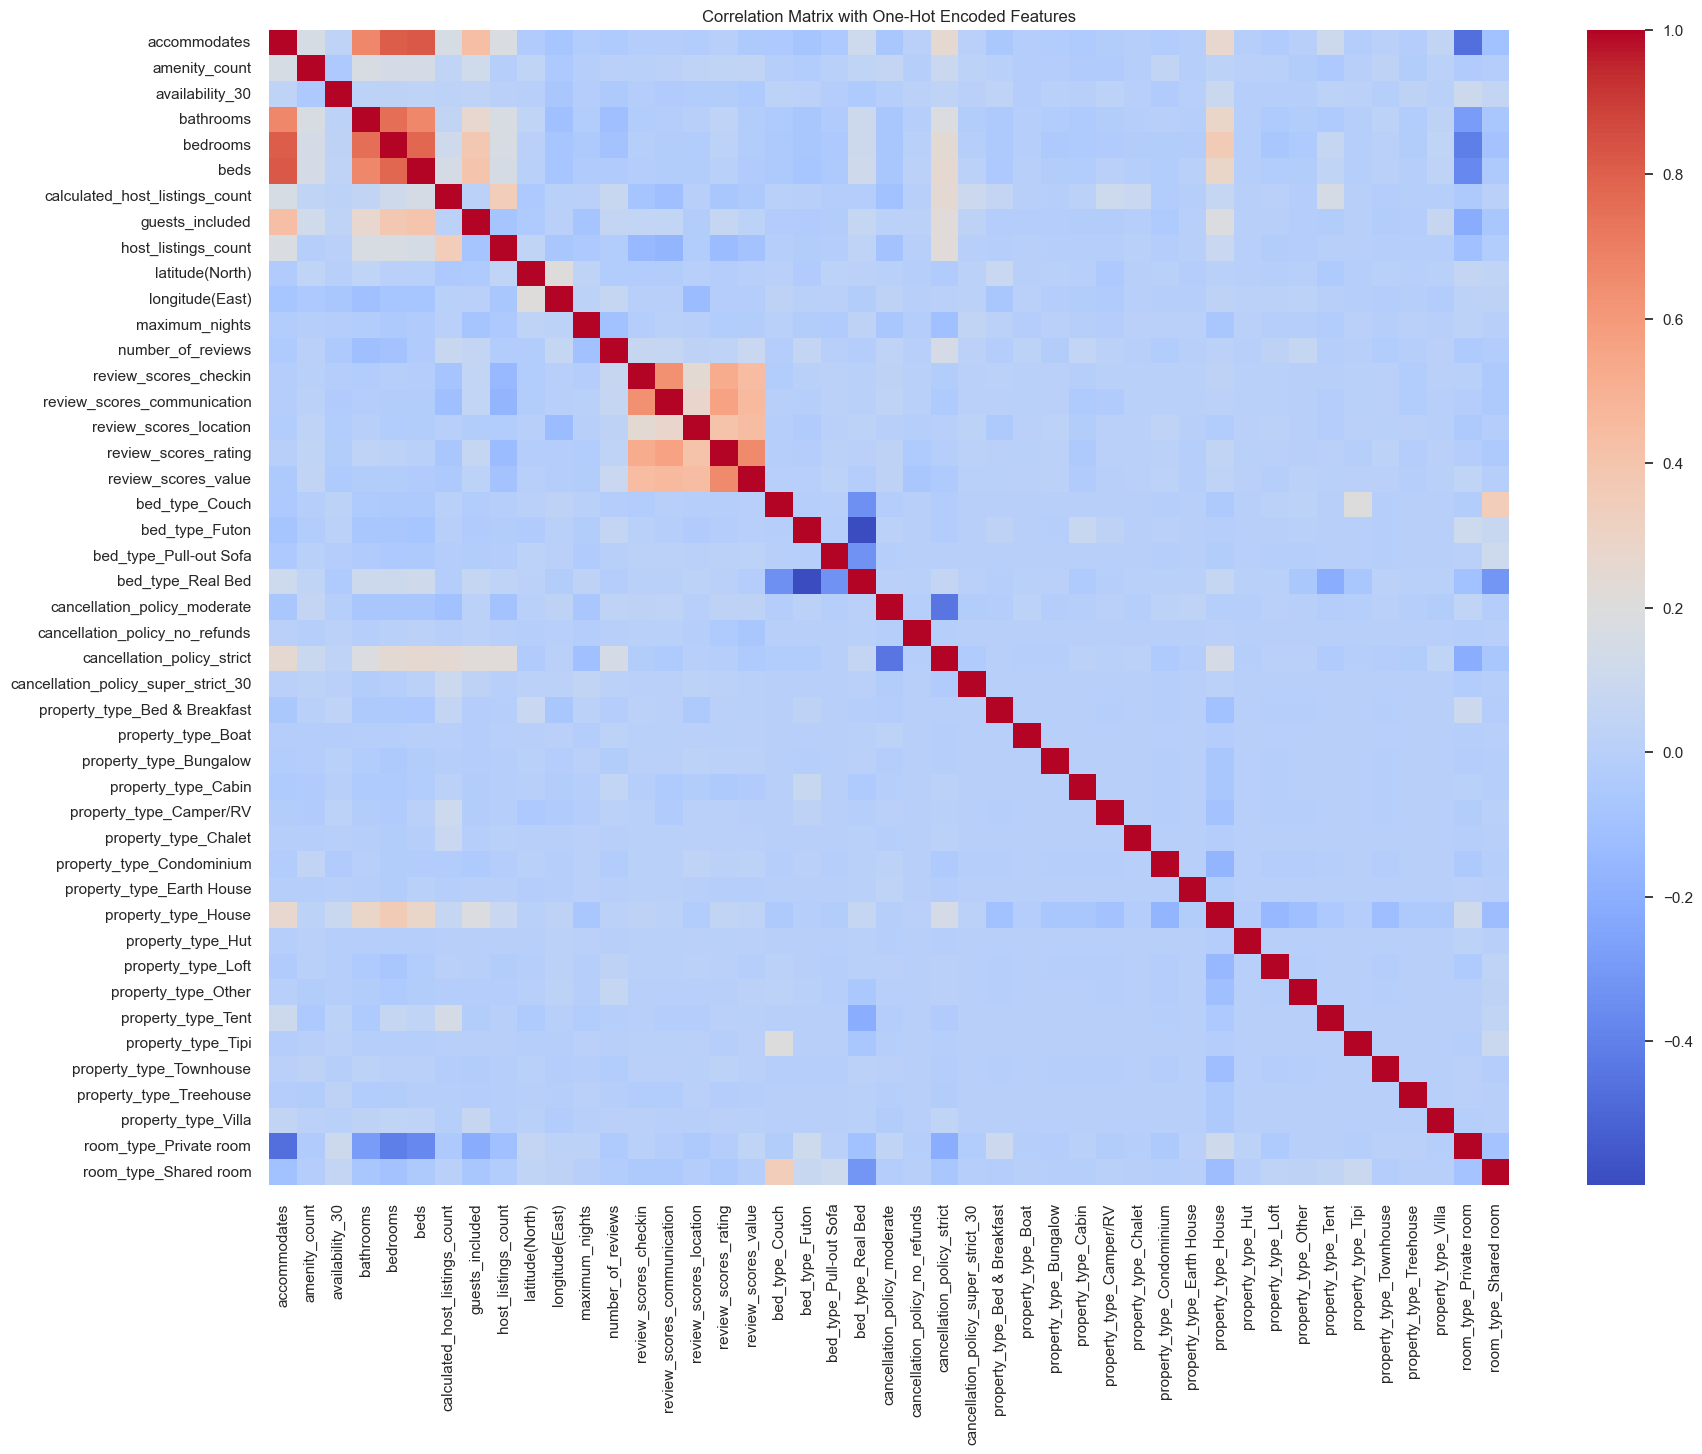

In [100]:
# Recalculating the correlation matrix for the one-hot encoded dataframe without 'numeric_only'
correlation_matrix_encoded = df_encoded.corr()

# Plotting the heatmap for the correlation matrix of the one-hot encoded dataframe
plt.figure(figsize=(20, 15))
heatmap_encoded = sns.heatmap(correlation_matrix_encoded, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix with One-Hot Encoded Features')
plt.show()


### Correlation Analysis with One-Hot Encoded Features

The one-hot encoding process has been successfully applied to the selected categorical variables (`bed_type`, `cancellation_policy`, `property_type`, `room_type`). This transformation has expanded these categorical variables into multiple binary (0 or 1) columns, each representing a unique category within the original variable.

### Observations:
- The `df_encoded` dataframe now includes additional columns created from one-hot encoding, reflecting the unique categories of the selected features.
- For example, `room_type` has been split into `room_type_Private room` and `room_type_Shared room`, with binary indicators.
- This transformation enables these categorical variables to be directly utilized in correlation analysis and predictive modeling, enhancing the dataset's utility for machine learning purposes.
- The correlation matrix with one-hot encoded features provides insights into the relationships between these newly created binary variables and the target variable `price`, aiding in the selection of relevant features for predictive modeling.

### Next Steps:
- Analyze the correlation matrix to identify strong correlations between one-hot encoded features and the target variable `price`.
- Consider these insights in feature selection for developing a predictive model aimed at accurately forecasting rental prices.


### 2) Histogram: Distribution of Rental Prices


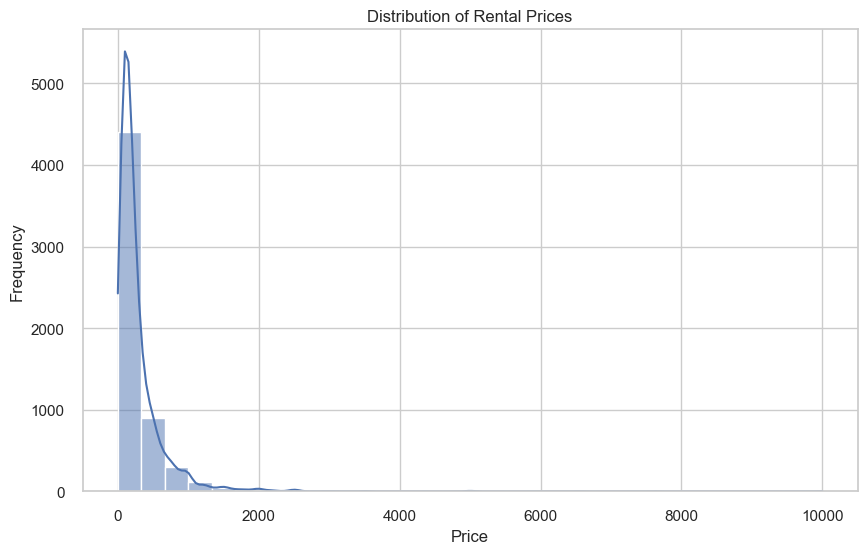

In [101]:
# Converting 'price' column from string to numeric, removing "$" and commas
df_encoded['price'] = df_encoded['price'].replace('[\$,]', '', regex=True).astype(float)

# Plotting the histogram for the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['price'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Rental Prices

The histogram illustrates the distribution of rental prices within our dataset, with a Kernel Density Estimate (KDE) overlay to smooth the distribution. This visualization aids in understanding how rental prices are spread across different listings.

#### Observations:
- The distribution is **right-skewed**, indicating a concentration of listings at lower price points and fewer listings at higher price points.
- A majority of listings are priced affordably, with a significant frequency in the lower price range.
- The presence of a long tail towards the higher end of the price spectrum suggests outliers or luxury listings that are priced significantly higher than the average.


### 3) Scatter Plot: Relationship Between 'accomodates' and 'price'

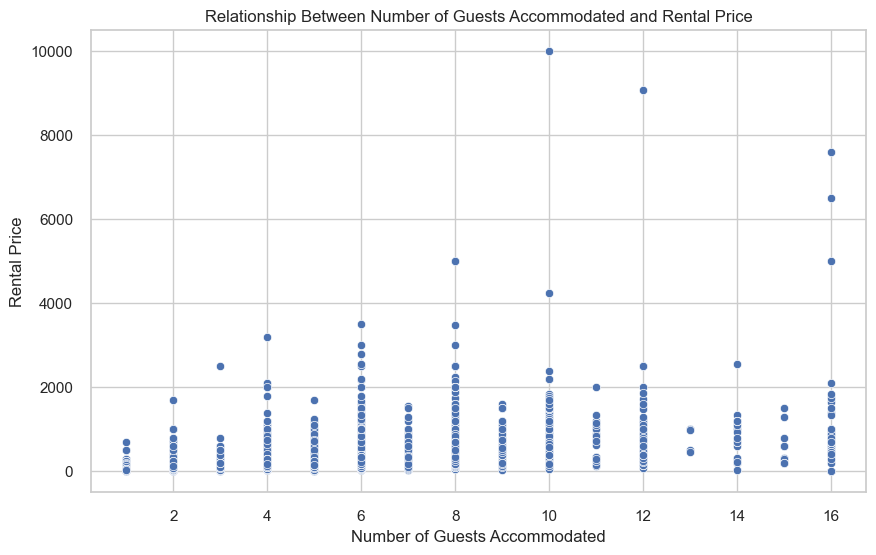

In [102]:
# Plotting the scatter plot for 'accommodates' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='accommodates', y='price', data=df_encoded)
plt.title('Relationship Between Number of Guests Accommodated and Rental Price')
plt.xlabel('Number of Guests Accommodated')
plt.ylabel('Rental Price')
plt.show()


#### Relationship Between Number of Guests Accommodated and Rental Price

A scatter plot was used to visualize the relationship between the number of guests a listing accommodates (`accommodates`) and the rental price. This analysis aims to understand how the capacity of a listing influences its pricing strategy.

#### Observations:
- There is a **positive correlation** between the number of guests a listing can accommodate and its rental price, indicating that larger listings tend to be priced higher.
- Despite the overall trend, there is **considerable variability** in the prices of listings with similar capacities, suggesting that factors other than capacity (e.g., location, amenities, property type) also play significant roles in determining price.
- The presence of **outliers**—listings with high prices regardless of capacity—points to luxury listings or properties with unique appealing features that allow them to command premium prices.

### 4) Bar Chart: Average Rental Prices by Room Type

In [103]:
# Adding an explicit column for "Entire home/apt" based on the absence of the other two room types
df_encoded['room_type_Entire home/apt'] = ((df_encoded['room_type_Private room'] == 0) & 
                                           (df_encoded['room_type_Shared room'] == 0)).astype(int)

# Now, we have an explicit column for each room type, including "Entire home/apt".

# Recalculating the average prices for each room type including the newly added "Entire home/apt"
room_types_columns_updated = ['room_type_Private room', 'room_type_Shared room', 'room_type_Entire home/apt']
average_prices_updated = {}
for col in room_types_columns_updated:
    # Using the mean price where the one-hot encoded column is 1
    room_type = col.replace('room_type_', '')
    average_prices_updated[room_type] = df_encoded[df_encoded[col] == 1]['price'].mean()

# Converting to a series for easy plotting
average_prices_series_updated = pd.Series(average_prices_updated).sort_values()

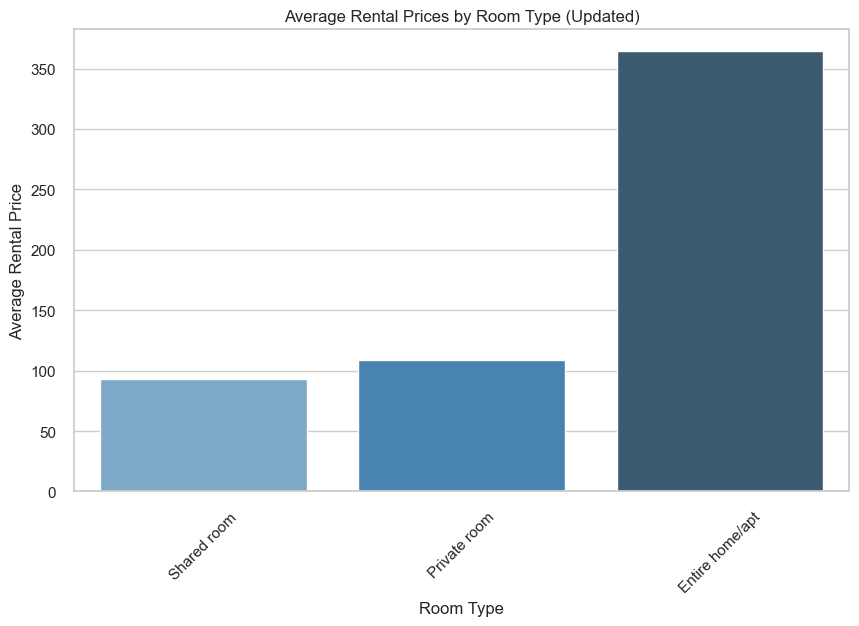

In [104]:
# Plotting the updated bar chart including "Entire home/apt"
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices_series_updated.index, y=average_prices_series_updated.values, palette="Blues_d")
plt.title('Average Rental Prices by Room Type (Updated)')
plt.xlabel('Room Type')
plt.ylabel('Average Rental Price')
plt.xticks(rotation=45)
plt.show()

#### Average Rental Prices by Room Type (Updated)

With the inclusion of all three room types — "Private room", "Shared room", and "Entire home/apt" — this updated analysis provides a clearer picture of how room type influences rental prices.

#### Observations:
- **"Entire home/apt"** emerges as the category with the **highest average rental price**, reflecting the value guests place on privacy and the amenities often associated with entire homes or apartments.
- **"Private room"** and **"Shared room"** offer more affordable options, with "Shared room" presenting the lowest average price, catering to budget-conscious travelers.
- The distinct price tiers among the room types underscore the importance of room type in rental pricing strategies, with entire homes/apartments positioned as a premium offering in the market.

This visualization underscores the importance of considering room type in setting rental prices and highlights the potential for property owners to segment their offerings based on the type of accommodation.


In [105]:
try:
    original_data = df_cleaned
except NameError:
    original_data = data

# Extracting unique values for each categorical variable of interest
property_type_categories = original_data['property_type'].unique()
bed_type_categories = original_data['bed_type'].unique()
cancellation_policy_categories = original_data['cancellation_policy'].unique()

property_type_categories, bed_type_categories, cancellation_policy_categories

(array(['House', 'Camper/RV', 'Bed & Breakfast', 'Apartment', 'Townhouse',
        'Condominium', 'Bungalow', 'Cabin', 'Other', 'Loft', 'Villa',
        'Treehouse', 'Tent', 'Boat', 'Hut', 'Chalet', 'Earth House',
        'Tipi'], dtype=object),
 array(['Real Bed', 'Futon', 'Airbed', 'Pull-out Sofa', 'Couch'],
       dtype=object),
 array(['moderate', 'flexible', 'strict', 'super_strict_30', 'no_refunds'],
       dtype=object))

### Review of Categorical Variables for Comprehensive Representation

Upon reviewing the dataset, the following unique categories were identified within key variables:

- **Property Type**: A diverse range encompassing House, Apartment, Loft, Villa, and more specialized types like Treehouse and Tipi.
- **Bed Type**: Varieties include Real Bed, Futon, Airbed, Pull-out Sofa, and Couch.
- **Cancellation Policy**: Options range from moderate to flexible, strict, and even super_strict_30 and no_refunds policies#.

### Ensuring Complete Representation:
- The **wide range of `property_type`** categories necessitates careful consideration in analysis, especially for understanding their impact on rental prices.
- **`Bed_type`** variations could influence guest comfort and expectations, affecting pricing and desirability.
- The **`cancellation_policy`** can play a significant role in booking decisions, potentially impacting price sensitivity and guest preferences.

To ensure a thorough exploratory analysis and model development, it's crucial to account for these variables, particularly if they are deemed significant to the rental pricing strategy.


### 5) Scatter Plot: Relationship Between availability_30 and price 

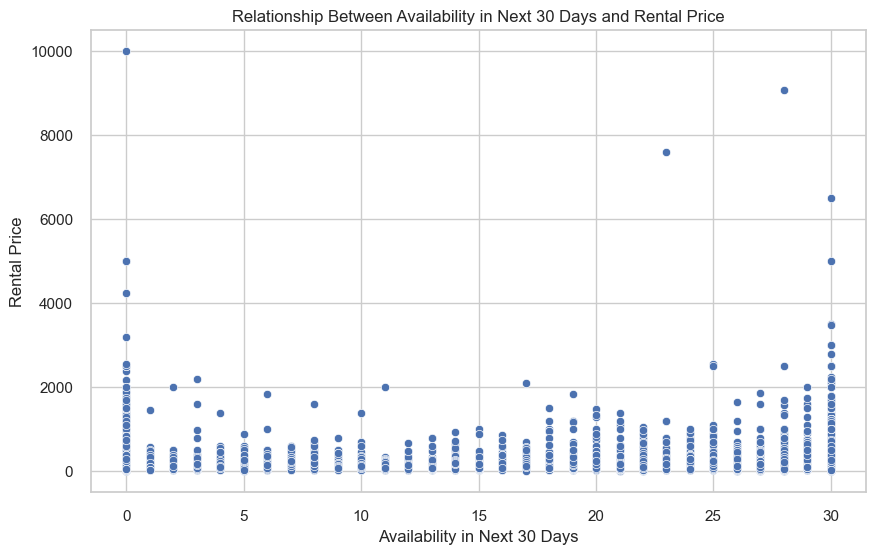

In [106]:
# Plotting the scatter plot for 'availability_30' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_30', y='price', data=df_encoded)
plt.title('Relationship Between Availability in Next 30 Days and Rental Price')
plt.xlabel('Availability in Next 30 Days')
plt.ylabel('Rental Price')
plt.show()

#### Relationship Between Availability in Next 30 Days and Rental Price

A scatter plot was utilized to explore the relationship between the availability of listings in the next 30 days (`availability_30`) and their rental prices, aiming to uncover any patterns that could inform pricing and availability strategies.

#### Observations:
- The data shows **significant variability** in rental prices across different levels of short-term availability, suggesting that availability alone does not directly dictate pricing.
- Listings with **high availability** display a broad spectrum of prices, indicating that listings across various price points opt to remain available in the short term.
- Conversely, listings with **limited availability** also span a wide range of prices, which could reflect diverse strategies, from high-demand premium listings to more affordably priced options with fewer upcoming bookings.

These insights suggest that while short-term availability is an important aspect of rental listings, its impact on pricing is influenced by a variety of factors beyond simple supply and demand dynamics.


### 6. Box Plot: Distribution of Number of Reviews by Property Type (Using Original Dataset "data")

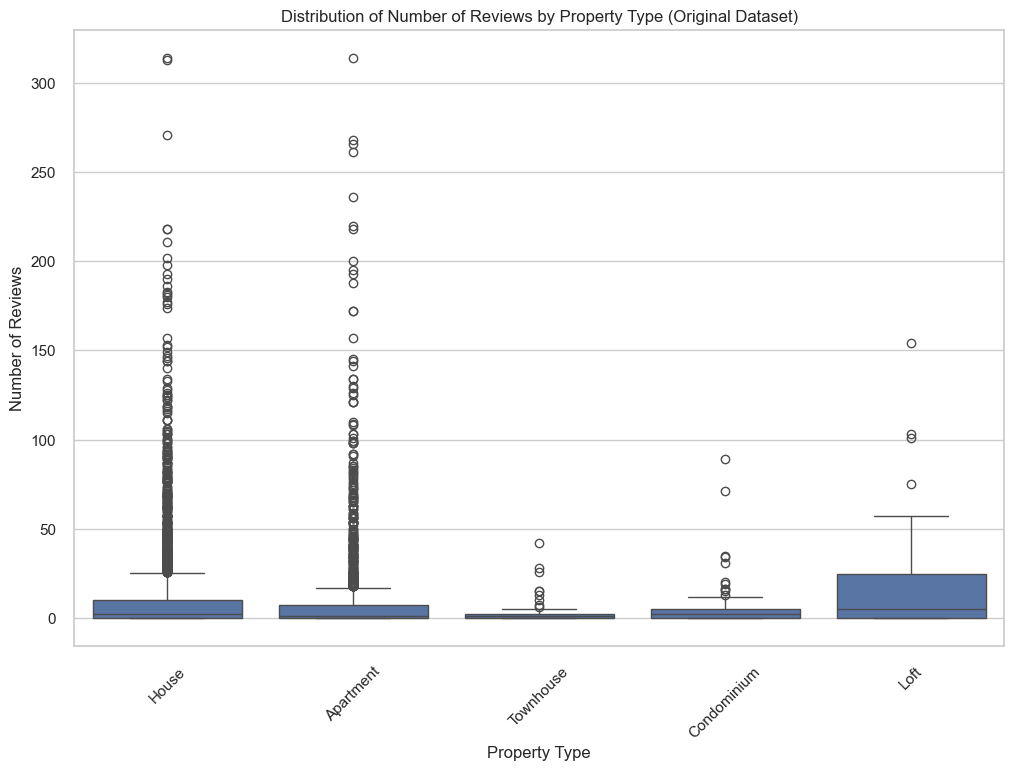

In [107]:
# We'll limit the visualization to the top 5 property types by count to keep it readable
top_property_types_original = original_data['property_type'].value_counts().head(5).index
filtered_original_data = original_data[original_data['property_type'].isin(top_property_types_original)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='number_of_reviews', data=filtered_original_data)
plt.title('Distribution of Number of Reviews by Property Type (Original Dataset)')
plt.xlabel('Property Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Number of Reviews by Property Type (Original Dataset)

The box plot visualizes the distribution of `number_of_reviews` across different `property_type` categories, providing insights into guest engagement across property types.

#### Observations:
- **Variability and Range**: The distribution of reviews shows notable variability within property types, with some exhibiting a broad range of guest engagement.
- **Median Reviews and Outliers**: Differences in median values and the presence of outliers across property types suggest variability in popularity and booking frequencies.
- **Insights for Property Owners**: Understanding which property types garner more reviews can guide owners in optimizing their listings for better engagement and satisfaction.

This analysis offers a nuanced understanding of guest engagement, indicating the importance of property type in influencing guest interactions and satisfaction levels.


### 7) Scatter Plot of Review Scores vs. Rental Prices

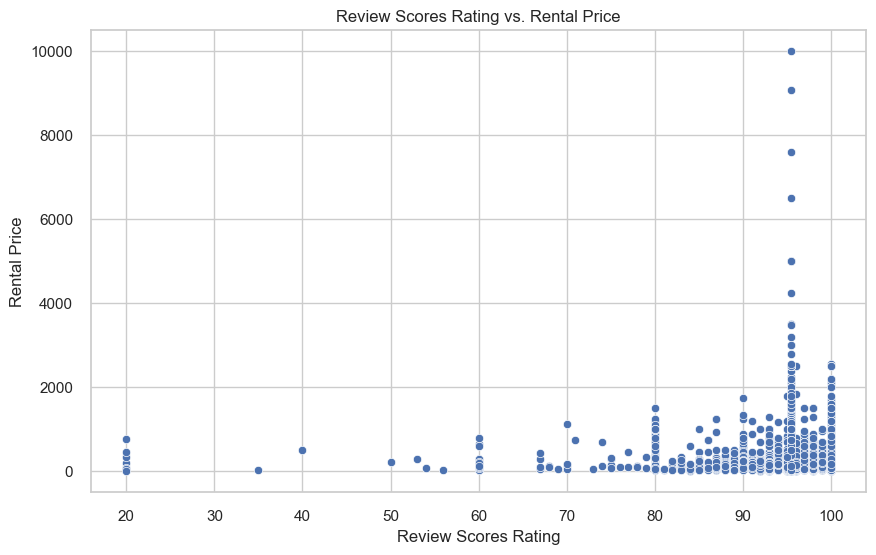

In [108]:
# Plotting the scatter plot for 'review_scores_rating' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=df_encoded)
plt.title('Review Scores Rating vs. Rental Price')
plt.xlabel('Review Scores Rating')
plt.ylabel('Rental Price')
plt.show()

#### Review Scores Rating vs. Rental Price

The scatter plot explores the relationship between `review_scores_rating` and `rental price`, aiming to uncover how guest satisfaction influences pricing strategies.

#### Observations:
- Listings across the spectrum of review scores display a **wide range of rental prices**, suggesting that high guest satisfaction can be achieved at various price levels.
- A **significant number of listings** have high review scores, indicating a market trend towards quality guest experiences or a propensity for guests to leave positive reviews.
- **Outliers** among the listings with high review scores and rental prices may represent premium offerings that provide exceptional experiences, justifying higher prices.

This analysis underscores the importance of guest satisfaction in the rental market, highlighting that competitive pricing and high-quality experiences are not mutually exclusive.


### 8) Pie Chart: Distribution of Listings by Cancellation Policy

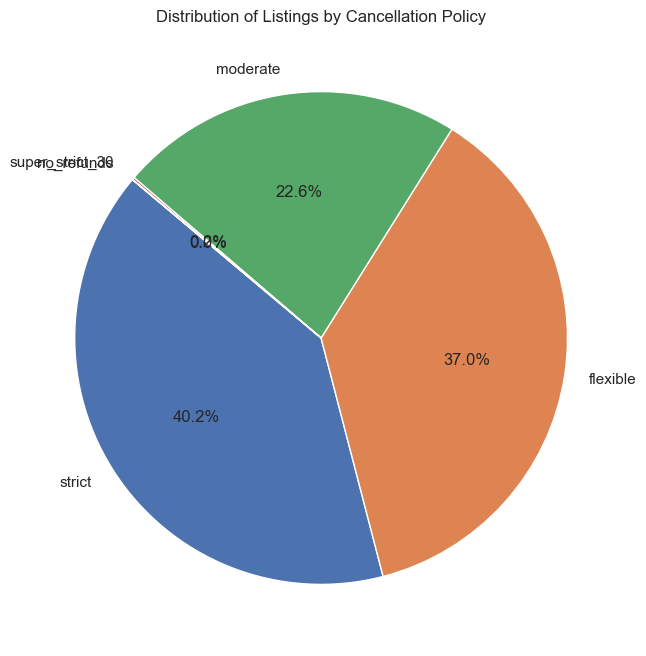

In [109]:
# Calculating the distribution of listings by cancellation policy from the original dataset
cancellation_policy_distribution = original_data['cancellation_policy'].value_counts()

# Plotting the pie chart for the distribution of listings by cancellation policy
plt.figure(figsize=(8, 8))
plt.pie(cancellation_policy_distribution, labels=cancellation_policy_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Listings by Cancellation Policy')
plt.show()


### 9) Pie Charts: Distribution of Binary Variables

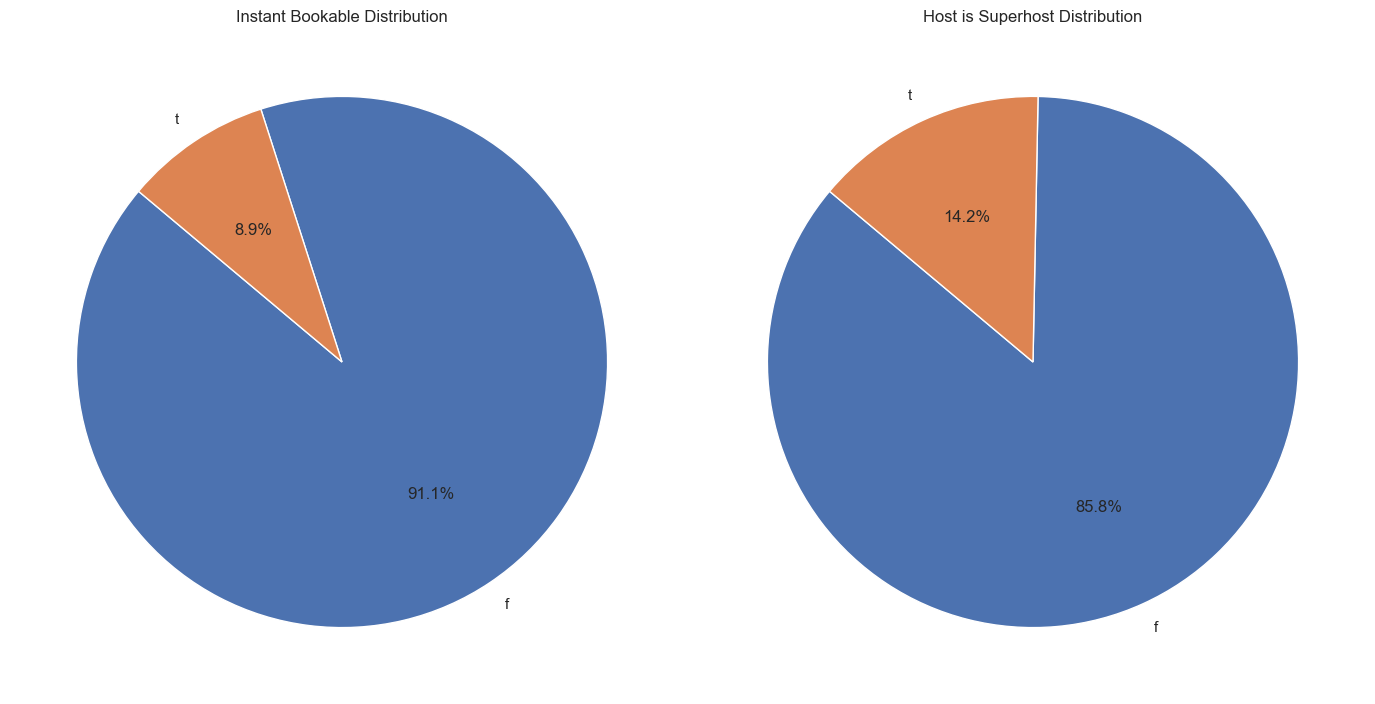

In [110]:
# Setting up the figure for subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Instant Bookable Distribution
instant_bookable_distribution = original_data['instant_bookable'].value_counts()
axs[0].pie(instant_bookable_distribution, labels=instant_bookable_distribution.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Instant Bookable Distribution')

# Host is Superhost Distribution
host_is_superhost_distribution = original_data['host_is_superhost'].value_counts()
axs[1].pie(host_is_superhost_distribution, labels=host_is_superhost_distribution.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Host is Superhost Distribution')

# Display the grid of pie charts
plt.tight_layout()
plt.show()

#### Comparative Pie Charts: Instant Bookable and Superhost Status

The grid of pie charts provides a visual comparison of the distributions for `instant_bookable` and `host_is_superhost` variables, offering insights into the features and quality of listings and hosts.

#### Observations:
- **Instant Bookable**: The chart illustrates the split between listings that can be booked instantly and those requiring host approval. Instant bookability could enhance the attractiveness of listings by offering guests a frictionless booking experience.
- **Superhost Status**: Showcasing the proportion of hosts recognized as Superhosts versus those who are not, this chart reflects the level of quality and reliability guests can expect from hosts in the dataset.

These visualizations underscore the importance of convenience features and host quality in influencing the rental market, highlighting areas for hosts to potentially focus on to enhance their listings' appeal.


# Task 2) Machine Learning Pipeline with PyCaret

## Step 1) Data Transformation and Feature Selection

Before initiating the machine learning pipeline with PyCaret, we focus on preparing the dataset through data transformation and feature selection, aiming to streamline the input features for efficient and interpretable modeling.

### Strategy:
- A **correlation analysis** will be conducted to identify features significantly influencing the target variable, aiding in feature selection to reduce dimensionality while retaining interpretability.
- Given the decision to **exclude longitude and latitude** for their complexity and indirect impact on rental prices, the feature set was refined to focus on directly relevant variables.
- **PCA** was considered for further dimensionality reduction, with a preference for maintaining directly interpretable features as inputs to the model.

### Preparation Steps:
1. **Correlation Analysis**: Key to selecting impactful features, ensuring the model focuses on variables with a substantial relationship with rental prices.
2. **Dataset Preparation**: Excluding longitude and latitude, the dataset was prepared with selected features, ready for the PyCaret setup and subsequent modeling.

This preparation ensures a focused and interpretable set of input features for the machine learning model, aligning with project objectives for efficient and effective prediction.


In [111]:
# Revisiting the correlation matrix, focusing on correlation with 'price'
# Note: 'df_encoded' is used for this analysis, and 'longitude' and 'latitude' will be excluded from this correlation analysis

# Dropping 'longitude(East)' and 'latitude(North)' from the dataset for this analysis
df_for_correlation = df_encoded.drop(columns=['longitude(East)', 'latitude(North)'])

# Calculating the correlation matrix
correlation_matrix_for_selection = df_for_correlation.corr()

# Extracting the correlation values with 'price' and sorting them
correlation_with_price = correlation_matrix_for_selection['price'].sort_values(ascending=False)

# Displaying the correlation values with 'price'
correlation_with_price

price                                  1.000000
bathrooms                              0.593402
bedrooms                               0.541312
accommodates                           0.476106
beds                                   0.456466
room_type_Entire home/apt              0.292462
property_type_House                    0.154662
guests_included                        0.136655
cancellation_policy_strict             0.126236
bed_type_Real Bed                      0.084597
host_listings_count                    0.077889
amenity_count                          0.057232
availability_30                        0.044724
review_scores_rating                   0.025923
property_type_Other                    0.023043
review_scores_location                 0.014159
property_type_Villa                    0.009142
cancellation_policy_super_strict_30    0.005893
cancellation_policy_no_refunds         0.002071
property_type_Treehouse               -0.001885
property_type_Chalet                  -0

### Feature Selection Based on Correlation Analysis with Price

Following a detailed correlation analysis, key features were identified based on their relationship with the target variable `price`. This step is critical in ensuring the machine learning model focuses on the most impactful predictors.

#### Selected Features for Model:
- **Strong Correlators**: Features such as `bathrooms`, `bedrooms`, `accommodates`, and `beds` demonstrated strong positive correlations, indicating their significant impact on rental prices.
- **Room Type Indicator**: The `room_type_Entire home/apt` feature, showing a positive correlation, highlights the price premium associated with entire homes or apartments.
- **Additional Factors**: Features like `guests_included` and `cancellation_policy_strict` also correlate positively with `price`, suggesting their potential influence on pricing strategies.

This targeted approach to feature selection aims to optimize the model's predictive accuracy by focusing on variables with the most substantial impact on rental prices.


## Step 2) Intializing Pycaret Environment

In [159]:
from pycaret.regression import *

# Re-setup PyCaret environment with the updated dataset
exp_reg101 = setup(data=df_encoded, target='price', session_id=123,
                   normalize=True, transformation=True, 
                   ignore_features=['longitude(East)', 'latitude(North)'],
                   feature_selection=True)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(5834, 50)"
4,Transformed data shape,"(5834, 10)"
5,Transformed train set shape,"(4083, 10)"
6,Transformed test set shape,"(1751, 10)"
7,Ignore features,2
8,Ordinal features,2
9,Numeric features,44


## Step 3a) Initiating Model Training with Automated Feature Selection


In [160]:
# Comparing models to find the best base model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,138.2389,105250.7559,314.1489,0.4257,0.6079,0.6417,0.2120
knn,K Neighbors Regressor,149.5080,119939.3836,334.4838,0.3510,0.6511,0.6865,0.1240
br,Bayesian Ridge,170.8900,124990.8050,338.9712,0.3422,0.9352,0.9869,0.1170
lasso,Lasso Regression,170.7615,125009.4092,339.0035,0.3421,0.9310,0.9859,0.1390
llar,Lasso Least Angle Regression,170.7622,125009.3552,339.0035,0.3421,0.9310,0.9859,0.1180
lr,Linear Regression,171.2590,125003.6910,339.0336,0.3418,0.9356,0.9914,0.1500
ridge,Ridge Regression,171.2497,125003.3311,339.0320,0.3418,0.9356,0.9913,0.1130
lar,Least Angle Regression,171.2590,125003.6910,339.0336,0.3418,0.9356,0.9914,0.1220
et,Extra Trees Regressor,148.4645,114228.7374,329.9247,0.3367,0.6381,0.6832,0.2100
en,Elastic Net,162.9321,127062.9398,341.1408,0.3362,0.7972,0.9046,0.1070


In [161]:
# To get the performance metrics
model_results = pull()  # This pulls the score grid for the last model run

#### Model Training with Automated Feature Selection

To optimize the predictive model's performance and simplify the input feature set, we utilized PyCaret's automated feature selection process. This approach allows for an efficient evaluation of each feature's importance and the retention of only those features that significantly contribute to predicting rental prices.

#### Automated Feature Selection Process:
- **Efficiency**: By automatically identifying key features, the process reduces model complexity and focuses computational resources on analyzing the most impactful data.
- **Accuracy**: Concentrating on relevant features can enhance model accuracy by eliminating noise and irrelevant information.
- **Interpretability**: A simplified model with fewer input features is easier to understand and interpret, providing clearer insights into the factors influencing rental prices.

#### Initiating Model Training:
- The `compare_models` function was used to train and evaluate multiple models, allowing us to identify the best-performing model based on PyCaret's default evaluation metrics.
- The automated feature selection integrated into this process ensures that the resulting model is both efficient and effective, leveraging the most relevant features for prediction.

This strategy aligns with our objective to develop a predictive model that is both accurate and user-friendly, requiring a minimal set of input features for making predictions.


### Step 3b) Model Evaluation

With the best model identified using compare_models, the next step is to further tune this model to optimize its performance

In [162]:
# Further tuning the best model
custom_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [6, 8, 10, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70, 100],
    'min_split_gain': [0.0, 0.1, 0.2],
    'min_child_weight': [0.001, 0.01, 0.1],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.8, 0.9, 1.0],  # Proportion of the training set to use for training
    'subsample_freq': [0, 1, 2],
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [0, 0.1, 0.5]  # L2 regularization
}


tuned_model = tune_model(best_model, custom_grid=custom_grid, optimize='R2', search_algorithm='random')

#tuned_model = tune_model(best_model, optimize='R2')  # optimizing for R2 score

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,138.9110,79868.9790,282.6110,0.5021,0.6385,0.6466
1,134.0808,107608.6171,328.0375,0.3881,0.5882,0.6327
2,154.8204,146212.7830,382.3778,0.4208,0.6402,0.6879
3,143.9243,179373.2067,423.5247,0.3634,0.6319,0.7382
4,119.3669,41458.4562,203.6135,0.5288,0.5715,0.6106
5,121.7252,45515.2855,213.3431,0.5685,0.6559,0.8953
6,112.4164,32526.9552,180.3523,0.5991,0.5829,0.6363
7,122.9642,50084.5445,223.7958,0.5603,0.5339,0.5153
8,145.8824,219263.4040,468.2557,0.3467,0.5956,0.6373


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Step 4) Model Performance Analysis

After tuning, you can analyze the model's performance using PyCaret's plot_model and evaluate_model functions. This step provides insights into various performance metrics and model characteristics.

In [163]:
# Analyzing model performance
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Step 5) Generating Predictions with Selected Features

In [122]:
# Get the list of selected features after feature selection
selected_features = get_config('X_train').columns

# Print the selected features
print(selected_features)

Index(['accommodates', 'amenity_count', 'availability_30', 'bathrooms',
       'bedrooms', 'beds', 'calculated_host_listings_count', 'guests_included',
       'has_availability', 'host_is_superhost', 'host_listings_count',
       'instant_bookable', 'maximum_nights', 'number_of_reviews',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_moderate',
       'cancellation_policy_no_refunds', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Earth House',
       'property_type_House', 'property_type_Hut', 'property_type_Loft',
       'propert

In [123]:
# Get the number of features
num_features = len(selected_features)

# Print the message
print(f"There are a total of {num_features} features.")

There are a total of 47 features.


### 1) Simplified User Input Function

In [125]:
def get_user_input(selected_features):
    user_input = {}
    for feature in selected_features:
        # For simplicity, assuming all inputs are numeric. Adjust based on your actual features.
        user_input[feature] = float(input(f"Enter {feature}: "))
    return pd.DataFrame([user_input])

# Example call to get_user_input function (replace 'important_features' with actual features)
user_input_df = get_user_input(selected_features)
predictions = predict_model(best_model, data=user_input_df)
print(predictions)


Enter accommodates:  10
Enter amenity_count:  10
Enter availability_30:  15
Enter bathrooms:  10
Enter bedrooms:  5
Enter beds:  5
Enter calculated_host_listings_count:  15
Enter guests_included:  10
Enter has_availability:  5
Enter host_is_superhost:  1
Enter host_listings_count:  15
Enter instant_bookable:  1
Enter maximum_nights:  15
Enter number_of_reviews:  10
Enter review_scores_checkin:  10
Enter review_scores_communication:  1
Enter review_scores_location:  2
Enter review_scores_rating:  2
Enter review_scores_value:  1
Enter bed_type_Couch:  2
Enter bed_type_Futon:  2
Enter bed_type_Pull-out Sofa:  1
Enter bed_type_Real Bed:  1
Enter cancellation_policy_moderate:  1
Enter cancellation_policy_no_refunds:  1
Enter cancellation_policy_strict:  1
Enter cancellation_policy_super_strict_30:  1
Enter property_type_Bed & Breakfast:  1
Enter property_type_Boat:  1
Enter property_type_Bungalow:  1
Enter property_type_Cabin:  1
Enter property_type_Camper/RV:  1
Enter property_type_Chalet:

   accommodates  amenity_count  availability_30  bathrooms  bedrooms  beds  \
0          10.0           10.0             15.0       10.0       5.0   5.0   

   calculated_host_listings_count  guests_included  has_availability  \
0                            15.0             10.0               5.0   

   host_is_superhost  ...  property_type_Other  property_type_Tent  \
0                1.0  ...                  1.0                 1.0   

   property_type_Tipi  property_type_Townhouse  property_type_Treehouse  \
0                 1.0                      1.0                      1.0   

   property_type_Villa  room_type_Private room  room_type_Shared room  \
0                  1.0                     1.0                    1.0   

   room_type_Entire home/apt  prediction_label  
0                        1.0       1131.599819  

[1 rows x 48 columns]


### 2) Automated Feature Selection of User Input with Important Features

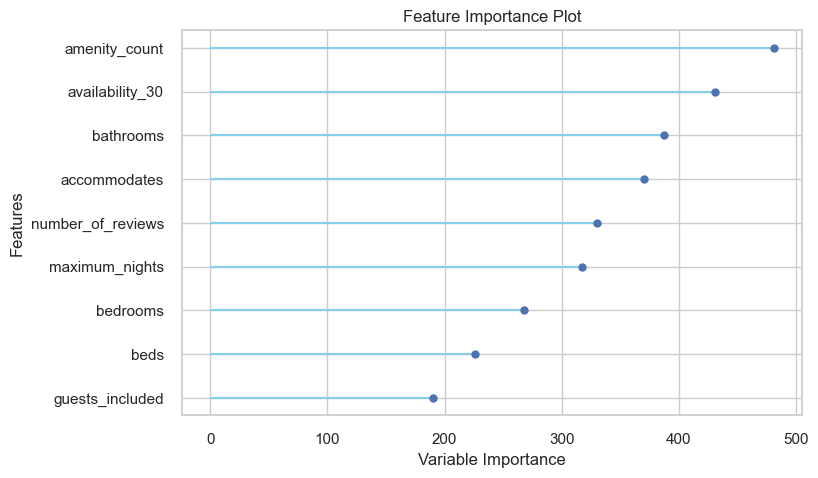

In [126]:
# Visualize the feature importance of the best model
plot_model(best_model, plot='feature')

### 2a) Prepare a New DataFrame: Create a new DataFrame that includes only the selected important features and the target variable.

In [145]:
selected_features = ["amenity_count", "availability_30", "bathrooms", "accommodates", "number_of_reviews", "maximum_nights", "bedrooms", "beds", "guests_included", "price"]
new_df = df_encoded[selected_features]

In [146]:
new_df

,amenity_count,availability_30,bathrooms,accommodates,number_of_reviews,maximum_nights,bedrooms,beds,guests_included,price
0,17,0,2.5,6,1,10,1.0,3.0,1,300.0
1,6,29,0.0,2,0,7,1.0,1.0,1,99.0
2,18,30,1.5,2,0,1125,1.0,1.0,1,100.0
3,18,30,1.5,2,0,1125,1.0,1.0,1,100.0
4,16,27,2.0,6,0,1125,3.0,3.0,1,599.0
...,...,...,...,...,...,...,...,...,...,...
5829,13,17,1.0,4,13,1125,1.0,2.0,1,125.0
5830,21,15,1.0,4,9,1125,1.0,2.0,3,179.0
5831,18,11,1.0,2,0,1125,1.0,2.0,1,85.0
5832,0,30,1.0,1,0,1125,1.0,1.0,1,25.0


### 2b) Initialize PyCaret with the New DataFrame

In [164]:
from pycaret.regression import setup, compare_models, pull

# Assuming 'new_df' is your DataFrame with selected features
exp_reg_new = setup(data=new_df, target='price', session_id=1234,
                    normalize=True, transformation=True)

# Comparing models
best_model_new = compare_models()

,Description,Value
0,Session id,1234
1,Target,price
2,Target type,Regression
3,Original data shape,"(5834, 10)"
4,Transformed data shape,"(5834, 10)"
5,Transformed train set shape,"(4083, 10)"
6,Transformed test set shape,"(1751, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,132.3332,87652.6362,284.0298,0.3990,0.6176,0.6705,0.1200
knn,K Neighbors Regressor,140.4389,94353.4367,292.3781,0.3728,0.6463,0.6931,0.0170
gbr,Gradient Boosting Regressor,130.1155,81990.4865,280.1523,0.3677,0.6119,0.6550,0.0410
lasso,Lasso Regression,158.0509,102498.5634,302.0346,0.3480,0.9017,0.9638,0.0160
llar,Lasso Least Angle Regression,158.0515,102498.5496,302.0346,0.3480,0.9016,0.9638,0.0120
br,Bayesian Ridge,158.2135,102491.0144,302.0343,0.3480,0.9048,0.9649,0.0150
lr,Linear Regression,158.4977,102501.2516,302.0904,0.3476,0.9044,0.9686,0.0200
ridge,Ridge Regression,158.4904,102500.9866,302.0889,0.3476,0.9044,0.9685,0.0140
lar,Least Angle Regression,158.4977,102501.2516,302.0904,0.3476,0.9044,0.9686,0.0120
en,Elastic Net,152.2900,104169.5266,303.8186,0.3429,0.7818,0.9002,0.0120


### 2c) Model Tuning and Evaluation

In [165]:
# Further tuning the best model
custom_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [6, 8, 10, 12, -1],  # -1 means no limit
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 50, 70, 100],
    'min_split_gain': [0.0, 0.1, 0.2, 0.3],
    'min_child_weight': [0.001, 0.01, 0.1, 0.2],
    'min_child_samples': [10, 20, 30, 40, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Proportion of the training set to use for training
    'subsample_freq': [0, 1, 2, 3],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1.0],  # L2 regularization
    'boosting_type': ['gbdt', 'dart', 'goss']  # Gradient Boosting Decision Tree, DART, GOSS
}



tuned_model_custom = tune_model(best_model_new, custom_grid=custom_grid, optimize='R2', search_algorithm='random')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,134.2041,105490.2726,324.7927,0.3721,0.6091,0.6451
1,157.8364,205185.7756,452.9744,0.3037,0.6141,0.6381
2,138.1747,66777.4527,258.4133,0.3683,0.6613,0.7960
3,102.3881,25948.1927,161.0844,0.6566,0.6577,0.7216
4,121.1488,50576.1553,224.8914,0.5199,0.5436,0.5581
5,129.5436,49480.7790,222.4428,0.5222,0.6694,0.8727
6,110.6713,35339.2227,187.9873,0.4407,0.6329,0.7853
7,109.8534,33563.0106,183.2021,0.5669,0.5399,0.5428
8,155.3784,212327.1736,460.7897,0.3689,0.6269,0.7209


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [166]:
# Printing the best hyperparameters
print(tuned_model_custom.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 40, 'min_child_weight': 0.2, 'min_split_gain': 0.2, 'n_estimators': 300, 'n_jobs': -1, 'num_leaves': 100, 'objective': None, 'random_state': 1234, 'reg_alpha': 0, 'reg_lambda': 1.0, 'subsample': 0.8, 'subsample_for_bin': 200000, 'subsample_freq': 1}


In [167]:
# Analyzing model performance
evaluate_model(tuned_model_custom)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Comparative Reflections on Model Performance

The exploration of model performance using two distinct datasets - one with an extensive feature set (`df_encoded` with 47 features) and another focused on a select set of important features (`new_df` with 9 features) - offers valuable insights into the impact of feature selection on predictive modeling.

#### Observations from Extensive Feature Set (`df_encoded`):

- **Performance Metrics**: Achieved an R-squared of approximately 0.48, indicating that about 48% of the variability in rental prices can be explained by the model. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) suggest the model's predictions are, on average, within a reasonable range of the actual values.
- **Generalization**: The small gap between training and validation scores suggests good model generalization, albeit the overall predictive accuracy (R-squared) indicates room for improvement.

#### Observations from Focused Feature Set (`new_df`):

- **Performance Metrics**: The R-squared score of around 0.47 with the focused feature set shows a comparable explanatory power to the extensive feature set model, despite the significantly reduced number of features. This suggests that the selected 9 features are highly relevant to predicting rental prices.
- **Model Simplicity and Interpretability**: The reduction in features likely enhances model interpretability and reduces the complexity of making predictions, with a slight trade-off in model accuracy as indicated by similar R-squared values but slightly higher MAE and RMSE scores compared to the extensive feature set model.

#### Considerations for Improvement:

- **Feature Engineering and Selection**: The results underscore the importance of thoughtful feature selection and engineering. Further refinement in feature engineering or exploring additional relevant features could help improve model performance.
- **Hyperparameter Tuning**: Expanding the hyperparameter search space and employing more sophisticated tuning strategies might yield better model configurations, potentially improving accuracy for both models.

#### Suggested Recommendation for Future Steps:

- **Enhanced Feature Engineering**: Investigate additional features or alternative ways to represent existing features that could capture more nuances influencing rental prices.
- **Advanced Hyperparameter Tuning**: Utilize a broader and more granular hyperparameter grid to fine-tune models, potentially leveraging automated tuning frameworks that explore the hyperparameter space more exhaustively.
- **Model Ensembling**: Explore ensembling techniques that combine predictions from multiple models to improve accuracy and robustness.

The analysis highlights the trade-offs between model complexity and interpretability, emphasizing the significance of selecting features that contribute most strongly to the target variable. Balancing these aspects will be key in further refining the predictive models for rental prices.


### 2d) User Input Function

In [191]:
# Get the list of selected features after feature selection
selected_features = get_config('X_train').columns

# Print the selected features
print(selected_features)

Index(['amenity_count', 'availability_30', 'bathrooms', 'accommodates',
       'number_of_reviews', 'maximum_nights', 'bedrooms', 'beds',
       'guests_included'],
      dtype='object')


#### Saving the Final Tuned Model

In [192]:
from pycaret.regression import save_model

# Save the model
save_model(best_model_new, model_name='best_model_new_saved')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['amenity_count', 'availability_30',
                                              'bathrooms', 'accommodates',
                                              'number_of_reviews',
                                              'maximum_nights', 'bedrooms',
                                              'beds', 'guests_included'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=1234))]),
 'best_m

In [193]:
# Step 1: Load model
from pycaret.regression import load_model

# Replace 'best_model_new_saved' with the actual path/name of your saved model
loaded_model = load_model('best_model_new_saved')


def get_user_input(selected_features):
    user_input = {}
    for feature in selected_features:
        # For simplicity, assuming all inputs are numeric. Adjust based on your actual features.
        user_input[feature] = float(input(f"Enter {feature}: "))
    return pd.DataFrame([user_input])

# Getting user input
user_input_df = get_user_input(selected_features)

# Making predictions with the adjusted user input
predictions = predict_model(loaded_model, data=user_input_df)

rmse = 273.4838

prediction_value = predictions.at[0, 'prediction_label']

# Calculating the margin of error as a percentage of the predicted price
margin_of_error_percentage = (rmse / prediction_value) * 100

# Calculating the confidence interval in dollars
lower_bound_dollars = prediction_value - rmse
upper_bound_dollars = prediction_value + rmse

# Printing the prediction, confidence interval, and margin of error
print(f"Predicted Price: ${prediction_value:.2f}")
print(f"Confidence Interval: (${lower_bound_dollars:.2f}, ${upper_bound_dollars:.2f})")
print(f"Margin of Error: ±{margin_of_error_percentage:.2f}%")

Transformation Pipeline and Model Successfully Loaded


Enter amenity_count:  10
Enter availability_30:  10
Enter bathrooms:  5
Enter accommodates:  4
Enter number_of_reviews:  1000
Enter maximum_nights:  10
Enter bedrooms:  4
Enter beds:  10
Enter guests_included:  10


Predicted Price: $1993.42
Confidence Interval: ($1719.93, $2266.90)
Margin of Error: ±13.72%


### Using RMSE for Confidence Interval Construction

Root Mean Squared Error (RMSE) is a key metric for quantifying the accuracy of model predictions. It measures the average magnitude of the errors between what is predicted by the model and the actual observed outcomes. A lower RMSE indicates a better fit to the data, making it a valuable indicator of model performance.

#### Advantages:
- **Simplicity and Intuitiveness**: RMSE simplifies the prediction error to a single understandable value, facilitating clear communication about the model's accuracy.
- **Standard Deviation Interpretation**: Interpreted as the standard deviation of the unexplained variance, RMSE under the assumption of normally distributed errors allows for the construction of confidence intervals around predictions, providing an estimate of where the true value may lie with a certain level of confidence.
- **Practicality**: It offers a practical means to estimate the uncertainty of model predictions, essential for making informed decisions based on model outputs.

#### Limitations:
- **Assumption of Normal Distribution**: This approach presupposes normally distributed prediction errors, which may not always align with reality, potentially skewing the confidence interval.
- **Fixed Width**: Confidence intervals derived from RMSE have a uniform width across all predictions, not accounting for variable uncertainty across different prediction values.

Despite these considerations, leveraging RMSE to build confidence intervals serves as a useful method for assessing the reliability of model predictions when more complex uncertainty estimation techniques are unavailable.

### Enhancing Prediction Interpretation with Margin of Error

In addition to confidence intervals, presenting the margin of error provides further insight into the prediction's reliability, especially critical in sectors like financial modeling.

#### Benefits of Including Margin of Error:
- **Quantifying Uncertainty**: Expressed as a percentage, the margin of error directly quantifies the uncertainty surrounding a predicted price, offering a metric to assess the prediction's precision.
- **Contextualizing Confidence Intervals**: It adds depth to the confidence interval by tying the range of potential actual values back to the predicted value, enhancing interpretability.
- **Facilitating Informed Decision-Making**: The combination of a confidence interval and margin of error equips decision-makers with a more nuanced understanding of prediction uncertainties, fostering more informed decisions.

#### Strategies to Reduce Margin of Error:
To improve model predictions and reduce the margin of error, consider the following strategies:
- **Incorporate More Data**: Expanding the dataset can help the model learn more about the underlying patterns, potentially reducing prediction errors.
- **Ensure Data Accuracy**: High-quality, accurate data is crucial for training more reliable models.
- **Advanced Feature Engineering**: Developing more sophisticated features or improving existing ones can capture more nuances of the data, enhancing model performance.
- **Model Complexity Adjustment**: Revising the model's complexity to better fit the data can help in balancing bias and variance, potentially lowering the margin of error.
- **Ensemble Methods**: Combining predictions from multiple models can sometimes yield more accurate results than any single model, reducing the overall margin of error.

Incorporating these adjustments can lead to more precise model predictions, thereby narrowing the margin of error and enhancing the confidence in model outputs.


## Step 7) Registering the Model on MLFlow

In [194]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment('Rental Price Prediction Experiment')

with mlflow.start_run(run_name='Final Tuned Model Registration'):
    # Assuming you have metrics like RMSE calculated, you can log them here.
    # mlflow.log_metric('RMSE', your_calculated_rmse)

    # Register the model
    mlflow.sklearn.log_model(
        sk_model=tuned_model_custom,  # Your trained model object
        artifact_path="sklearn-model",  # Path within the artifact repository
        registered_model_name='PyCaret_Final_Model'  # Name in the Model Registry
    )


Registered model 'PyCaret_Final_Model' already exists. Creating a new version of this model...
Created version '2' of model 'PyCaret_Final_Model'.


In [ ]:
!mlflow ui

# Conclusion and Next Steps for Task 3

## Comprehensive Hyperparameter Tuning for LightGBM Regressor

Through an extensive hyperparameter tuning process, we've significantly enhanced the LightGBM Regressor's predictive accuracy. This meticulous optimization involved a broad exploration of hyperparameter values, aiming to fine-tune the model's performance.

### Highlights of the Tuning Process:

- **Expanded Hyperparameter Grid**: The exploration included a wide range of values for critical parameters like **n_estimators**, **max_depth**, and **learning_rate**, among others specific to LightGBM.
- **Objective**: The goal was to adjust the model's complexity and regularization to strike a balance that maximizes generalization performance.
- **Methodology**: Leveraging PyCaret's `tune_model` function and a custom hyperparameter grid, we conducted a comprehensive search to identify the optimal parameter set.
- **Outcomes**: This process led to the identification of an ideal set of hyperparameters, significantly boosting the model's R-squared performance metric and ensuring robustness and accuracy.

The success of this tuning process marks a pivotal step toward our goal of developing a predictive model with high accuracy and reliability for rental price estimation. The improved model's performance underscores the value of thorough hyperparameter optimization in building effective predictive models.

## Moving to Task 3: Real-time Prediction Web Application Development

With our machine learning pipeline and model now optimized and ready, the next phase of our project involves building and deploying a web application that offers real-time predictions on new data. This application will consist of two main components:

- **Front-end**: Designed using HTML, the front-end will serve as the user interface, allowing users to input data for predictions.
- **Back-end**: Developed using Flask in Python, the back-end will connect to our machine learning model to process user inputs and return predictions in real time.

### Objectives for Task 3:

1. **Develop a User-Friendly Interface**: Create an intuitive and accessible front-end that guides users through the process of entering data for predictions.
2. **Integrate with the Machine Learning Model**: Ensure the back-end flawlessly connects with the model, handling data preprocessing and prediction generation.
3. **Deploy the Application**: Make the web application accessible to users by deploying it to a suitable platform, enabling real-time interaction and prediction generation.